Tinder is one of the most popular dating applications. It connects people having similar interests. To check whether Tinder helps people find partners, we can analyze the sentiments of people about Tinder. There are a lot of reviews on the Google Play Store about Tinder. We can use that data to analyze the sentiments of Tinder users.

## Tinder Reviews Sentiment Analysis using Python


In [1]:
# Dataset from kaggle https://www.kaggle.com/datasets/shivkumarganesh/tinder-google-play-store-review?resource=download
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

data = pd.read_csv("/home/eosindo/Documents/dataset/tinder_google_play_reviews.csv")

In [2]:
data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,2c6cda3b-db40-4745-9b7d-674ff4c58295,Taleiya Peña,https://play-lh.googleusercontent.com/a-/ACNPE...,I'm 22 years old. I've had tinder on and off s...,1,0,13.15.1,2022-10-07 02:56:37,NaN,NaN
1,4c97ef51-a7b7-40e4-9df3-37be2c565209,Shannan Matthews,https://play-lh.googleusercontent.com/a/ALm5wu...,"Just got randomly banned with no explanation, ...",1,0,12.17.0,2022-10-07 02:47:10,NaN,NaN
2,7696fd09-bd98-4f86-821e-dc1a7c525fde,Lisa Hopkins,https://play-lh.googleusercontent.com/a-/ACNPE...,Rubbish u got to pay see pick,1,0,13.17.0,2022-10-07 02:39:41,NaN,NaN
3,6f764d16-995e-40c2-9c49-a7855c4ab5d0,Alyce Hopkins,https://play-lh.googleusercontent.com/a-/ACNPE...,Kicked me off and won't let me on says I'm ban...,1,0,13.18.2,2022-10-07 02:13:28,NaN,NaN
4,0f2b0142-c0e6-4aaf-83b7-3ea499eaf466,Romanian SwoleJer,https://play-lh.googleusercontent.com/a-/ACNPE...,This app has the most good looking women on it...,4,0,13.17.0,2022-10-07 01:57:04,NaN,NaN


To analyze the Tinder reviews, we only need the content column. So lets create a new dataset with the content column and move further

In [3]:
data = data[["content"]]

In [4]:
#Now lets see if we have null values in the content column
data.isnull().sum()

content    1340
dtype: int64

In [5]:
# The content column also ccontains nulll values, lets remove the null values and move on:
data = data.dropna()

Now lets prepare this data for the task of sentiment analysis. Here we have to clean the text in the content column:

In [6]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["content"] = data["content"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/eosindo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Now lets have a look at the kind of words people use in the reviews of Tinder:

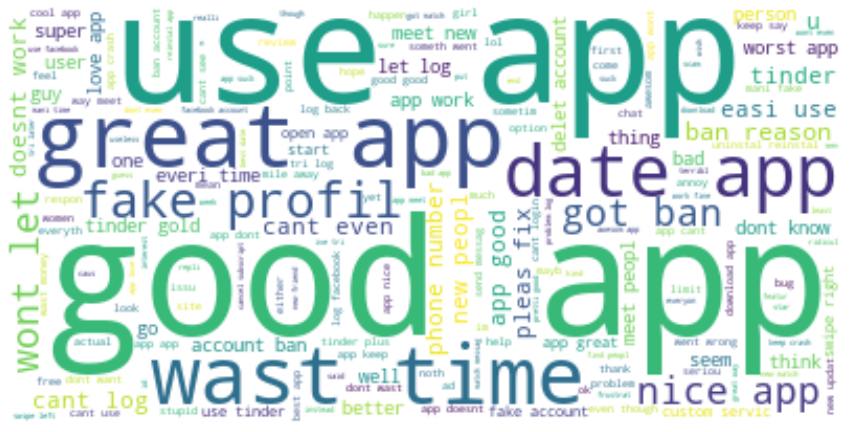

In [7]:
text = " ".join(i for i in data.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now i will add three more columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the reviews:

In [8]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"]for i in data["content"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["content"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["content"]]
data = data[["content", "Positive", "Negative", "Neutral"]]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/eosindo/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [9]:
data.head()

,content,Positive,Negative,Neutral
0,im year old ive tinder sinc year ban told un...,0.149,0.185,0.667
1,got random ban explan sick app,0.000,0.633,0.367
2,rubbish u got pay see pick,0.000,0.259,0.741
3,kick wont let say im ban wont say,0.000,0.340,0.660
4,app good look women ive seen date app simpl ea...,0.225,0.000,0.775


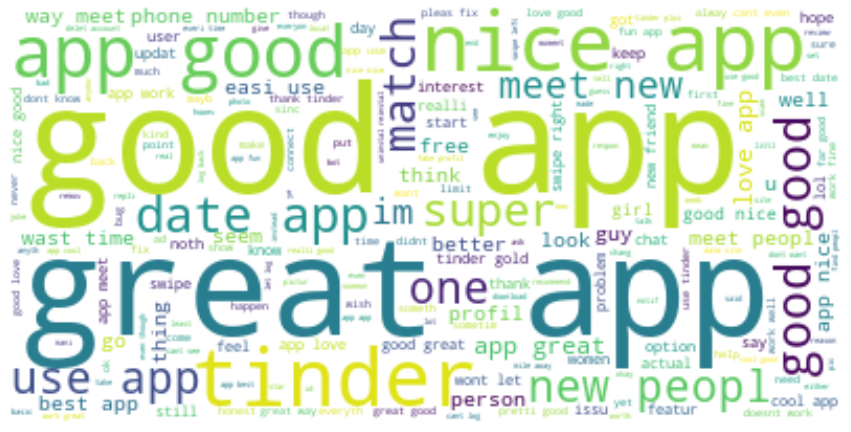

In [10]:
positive =' '.join([i for i in data['content'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now lets have a look at the kind of words people use in the negative reviews of Tinder:

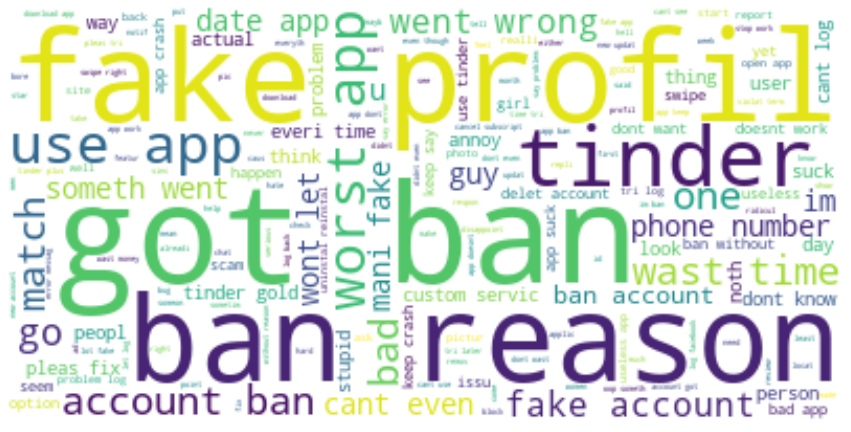

In [12]:
negative =' '.join([i for i in data['content'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Lets have a look at the overall sentiment score of the users of Tinder:

In [13]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


So most of the users write reviews neutrally. Lets have a look at the total of all the sentiment scores:

In [14]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  161912.39200002688
Negative:  62459.96699999919
Neutral:  324702.58999996644


As you can see, the positive is much more than the negative, we can say that most users are happy with Tinder.

### Summary

In [ ]:
So this is how you can perform the task of Tinder reviews sentiment analysis using Python. Tinder is one of the most popular dating applications. It connects people having similar interest.